# Readmisión en Pacientes Diabéticos

## Descripción

El siguiente dataset representa los datos de varios años de atención clínica a
personas diabéticas en más de 100 hospitales de EEUU. El dataset tiene múltiples
características que representan los resultados del paciente y del hospital o centro de
atención.

# Objetivo

Realizar un modelo de predicción que determine si un
paciente será readmitido en el hospital en menos de 30 días.

# librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split

# Data QA

In [2]:
# import data, we'll check the dtypes in the next section
data = pd.read_csv('diabetes_data/diabetic_data.csv')

C:\Users\juanp\AppData\Local\Temp\ipykernel_65240\3535789320.py:2: DtypeWarning: Columns (3,4,7,10,17,22,27,28,29,30,31,33,37,41,54) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('diabetes_data/diabetic_data.csv')


In [3]:
# unique values
for column in data.columns:
    print(column)
    print(data[column].unique())

diag_1
['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '277' '584' '462' '473' '411' '174' '486' '998' '511' '432' '626' '295'
 '196' '250.6' '618' '182' '845' '423' '808' '250.4' '722' '403' '250.11'
 '784' '707' '440' '151' '715' '997' '198' '564' '812' '38' '590' '556'
 '578' '250.32' '433' 'V58' '569' '185' '536' '255' '250.13' '599' '558'
 '574' '491' '560' '244' '250.03' '577' '730' '188' '824' '250.8' '332'
 '562' '291' '296' '510' '401' '263' '438' '70' '250.02' '493' '642' '625'
 '571' '738' '593' '250.42' '807' '456' '446' '575' '250.41' '820' '515'
 '780' '250.22' '995' '235' '250.82' '721' '787' '162' '724' '282' '514'
 'V55' '281' '250.33' '530' '466' '435' '250.12' 'V53' '789' '566' '822'
 '191' '557' '733' '455' '711' '482' '202' '280' '553' '225' '154' '441'
 '250.81' '349' '?' '962' '592' '507' '386' '156' '200' '728' '348' '459'
 '426' '388' '607' '337' '82' '531' '596' '28

[8222157 55629189 86047875 ... '96870933' '24122547' '23207931']
metformin-pioglitazone
['No' 'Steady' 'abcde']
num_procedures
[0 5 1 6 2 3 4 '0' '1' '5' '4' '2' '3' '6' 'abcde']
acetohexamide
['No' 'Steady' 'abcde']
max_glu_serum
['None' '>300' 'Norm' '>200' 'abcde']
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR' 'abcde']
admission_type_id
[6 1 2 3 4 5 8 7 '1' '3' '8' '2' '6' '5' '7' '4' 'abcde']
insulin
['No' 'Up' 'Steady' 'Down' 'abcde']
repaglinide
['No' 'Up' 'Steady' 'Down' 'abcde']
nateglinide
['No' 'Steady' 'Down' 'Up' 'abcde']
discharge_disposition_id
[25 1 3 6 2 5 11 7 10 4 14 18 8 13 12 16 17 22 23 9 20 15 24 28 19 27 '1'
 '4' '6' '7' '22' '3' '11' '28' '2' '5' '14' '13' '23' '24' '18' '25' '19'
 'abcde' '10' '8' '12' '9' '15' '17' '20' '16' '27']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)' 'abcde']
medical_specialty
['Pediatrics-Endocrinology' '?' 'InternalMed

## Reporting

In [4]:
# nan gender
len(data[data['gender'] == 'Unknown/Invalid']) / len(data)

3.1315146689094276e-05

In [5]:
# drop the unknown gender
data = data[data['gender'] != 'Unknown/Invalid']

In [6]:
# nan race
len(data[data['race']=='?']) / len(data)

0.022337346271367665

In [7]:
# since we have 2% missing values, we can drop the rows
data = data[data['race'] != '?']

In [8]:
# see how many values are missing in weight
# since 97% is missing, we are dropping the column in the feature engineering section
len(data[data['weight'] != '?']) / len(data)

0.03075036378778588

In [9]:
# replacing abcde values
data.replace('abcde', pd.NA, inplace=True)

In [10]:
# drop duplicated values
data = data.drop_duplicates(keep='first')

In [11]:
# take out the outliers
data = data[data['glimepiride-pioglitazone'] != 'Steady']
data = data[data['acetohexamide'] != 'Steady']

# Feature engineering

In [12]:
# eliminate columns without predictive power
data = data.drop(columns=['patient_nbr', 'encounter_id', 'out', 'payer_code', 'payer_code_2', 'name', 
                          'metformin-rosiglitazone', 'examide', 'citoglipton', 'US', 'metformin-pioglitazone', 
                          'glimepiride-pioglitazone', 'medical_specialty', 'troglitazone', 'troglitazone_2', 
                          'weight', 'metformin-pioglitazone_2', 'acetohexamide', 'glyburide-metformin_2'])

In [13]:
# drop all the nans
data = data.dropna(axis=0)

In [14]:
# med encoding
def get_encoding_med(value: str) -> int:
    '''Returns an ascending encoder for the dosis in meds'''
    encoder = {
        'No': 0,
        'Steady': 1,
        'Down': 2,
        'Up': 3,
    }
    return encoder.get(value, 4)


meds_to_encode = ['glyburide', 'miglitol', 'glipizide',  'metformin', 'acarbose', 'chlorpropamide', 'tolazamide', 
                  'glipizide-metformin', 'glimepiride', 'pioglitazone', 'rosiglitazone', 'insulin', 'repaglinide',
                  'nateglinide', 'glyburide-metformin', 'glyburide-metformin']
for med in meds_to_encode:
    data[med] = data[med].apply(lambda row: get_encoding_med(row))

In [15]:
# diag encoding
def get_clean_diag(value) -> int:
    '''Returns the encoding of the diagnostics'''
    if value is pd.NA or  value == '?':
        return '0'
    elif value[0] == 'E':
        trunc = float(value[1:]) // 200
        return 'E' + str(trunc)
    elif value[0] == 'V':
        trunc = float(value[1:]) // 20
        return 'V' + str(trunc)
    else:
        trunc = float(value) // 200
        return str(trunc)


for diag in ['diag_1', 'diag_2', 'diag_3']:
    data[diag] = data[diag].apply(lambda row: get_clean_diag(row))

In [16]:
# age encoding for sci kit learn
def get_age_clean(value) -> int:
    'return the age as a number format'
    return value[-3:-1]


data['age'] = data['age'].apply(lambda row: get_age_clean(row))

In [17]:
# standarize values
def get_standarized_values(values: pd.Series) -> pd.Series:
    '''Returns normalized values'''
    values = values.astype(float)
    mean = values.mean()
    std = values.std()
    normalized_values = (values - mean) / std
    return normalized_values


numeric_columns = ['number_inpatient', 'number_diagnoses', 'time_in_hospital', 'num_lab_procedures',
                   'num_medications', 'number_emergency', 'num_procedures', 'number_outpatient', 
                   'admission_source_id', 'admission_type_id', 'discharge_disposition_id', 'time_in_hospital']
for column in numeric_columns:
    data[column] = get_standarized_values(data[column])

In [18]:
# make dummie variables
data = pd.get_dummies(data, columns=['diag_1', 'diag_2', 'diag_3', 'race', 'gender', 'max_glu_serum', 'A1Cresult', 'change', 
                                     'diabetesMed', 'tolbutamide'],
                      drop_first=True)

In [19]:
# make the target variable binary
data['readmitted_binary'] = (data['readmitted'] == '<30').astype(int)

# Split Data

In [20]:
X = data.drop(['readmitted', 'readmitted_binary'], axis=1)
y = data['readmitted_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo predictivo

In [21]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Feature importance

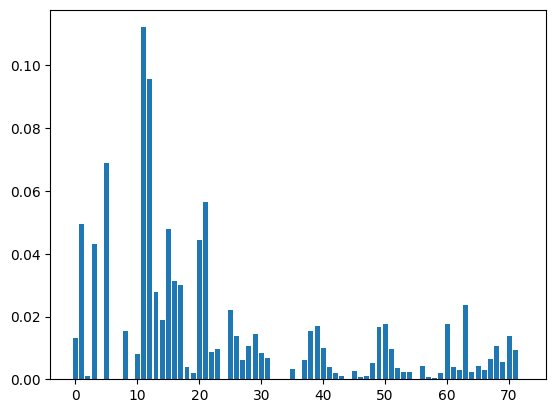

In [22]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xtitle= X.columns
plt.show()

# Feature selection

In [23]:
# there are 73 features, but we get most predictive power from just 10
# but we are going to use 30 features that is the simplest model 
# that has the highest metrics

sfm = SelectFromModel(model, threshold=-np.inf, max_features=30) 
sfm.fit(X, y)
X_selected = sfm.transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train your model on the selected features
model_selected = RandomForestClassifier(random_state=42)
model_selected.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_selected.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

# Evaluar Modelo

In [24]:
accuracy

0.9309241841514032

In [25]:
f1_score(y_test, y_pred)

0.5603490063015026

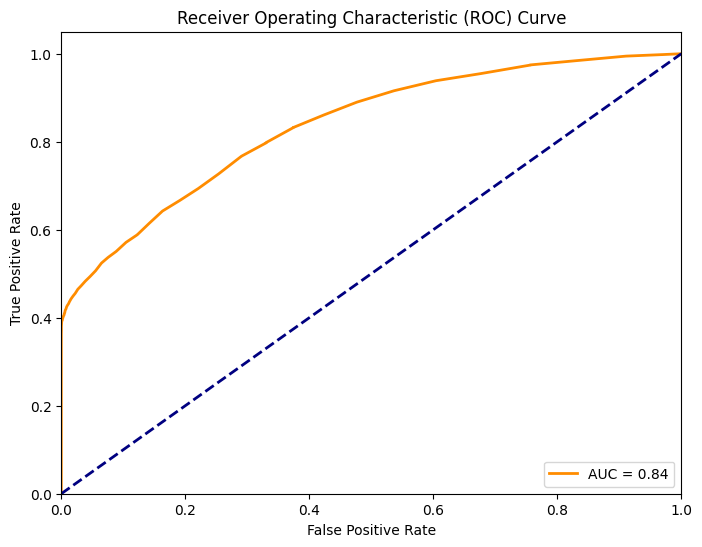

In [26]:
# ROC Curve
y_prediction = model_selected.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()